In [1]:
#plot MHW Level

import xarray
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [10]:
#進資料庫拿資料
conn=psycopg2.connect(database="postgres", user="chem", password="NTU000107", host="127.0.0.1", port="5432")
cursor_level = conn.cursor('2016level',cursor_factory=psycopg2.extras.DictCursor)
cursor_level.execute("SELECT lat,lon,level FROM sst_anomaly_without_detrend WHERE date = '2023-06-01' ORDER BY lat ASC,lon ASC")
anomaly_level=cursor_level.fetchall()
anomaly_level_result = pd.DataFrame(np.array(anomaly_level), columns = ['lat','lon','level'])
df_multiindex = anomaly_level_result.set_index(['lat', 'lon'])
result=df_multiindex.to_xarray()

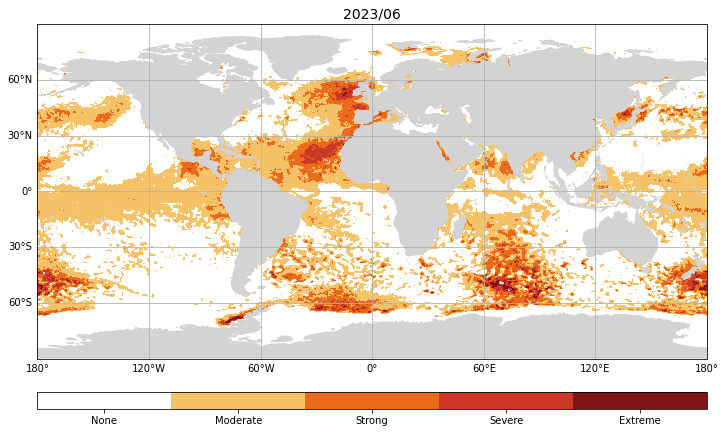

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
size = (12, 10)
#facecolor:the background color
#edgecolor:the border color
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')
#投影法
ax = plt.subplot(projection=ccrs.PlateCarree())
level_colors = ["#ffffff","#f5c268", "#ec6b1a", "#cb3827", "#7f1416"]
p=result.level.plot(
        transform=ccrs.PlateCarree(),
        levels=[0, 1, 2, 3, 4, 5],
        colors=level_colors,
        ax=ax,
        add_colorbar=False)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', 
                                                facecolor='lightgray'))
plt.title(str('2023/06'),
              fontsize=14)
axins1 = inset_axes(ax, width="100%", height="5%", borderpad=-5, loc='lower center')

cbar = fig.colorbar(p, ax=ax,orientation="horizontal",cax=axins1)
cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
cbar.set_ticklabels(['None','Moderate','Strong','Severe','Extreme'])
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#filename = str(pd.to_datetime(sst_an_dt.coords['time'].values).strftime('%Y%m'))
#plt.savefig(f"{filename}.png")    
#plt.show()